Analysis Notebook
================


1. Display (random) pictures from all datasets 
2. Plot of Loss-History
3. Plot of Train/Val-Accuracy-History
4. Display correct classified/ mis-classified Images from Validation Set
5. Confusion Matrix

In [1]:
import matplotlib.pyplot as plt
import itertools
import copy
import warnings
import json
import numpy as np
import os
import math
import torch
%load_ext autoreload
%autoreload 2

In [2]:
# Load logging file

# we want to leave the git (../../../)
path = "../../../DeepQAModels/"
file = "s2s_model"
session_directory = os.path.join(path, file)

#print(session_directory)
#root, dirs, files = (os.walk(session_directory))
for root, dirs, files in (os.walk(session_directory)):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))
    print(root)
    print(dirs)
    print(files)    


../../../DeepQAModels/s2s_model/logs.txt
../../../DeepQAModels/s2s_model/model_s2s.opt
../../../DeepQAModels/s2s_model/model_s2s.log
../../../DeepQAModels/s2s_model/model_s2s.best_valid
../../../DeepQAModels/s2s_model/model_s2s.shutdown_state
../../../DeepQAModels/s2s_model/model_s2s.shutdown_state.opt
../../../DeepQAModels/s2s_model/model_s2s.dict
../../../DeepQAModels/s2s_model/model_s2s
../../../DeepQAModels/s2s_model/model_s2s.test
../../../DeepQAModels/s2s_model/model_s2s.valid
../../../DeepQAModels/s2s_model
[]
['logs.txt', 'model_s2s.opt', 'model_s2s.log', 'model_s2s.best_valid', 'model_s2s.shutdown_state', 'model_s2s.shutdown_state.opt', 'model_s2s.dict', 'model_s2s', 'model_s2s.test', 'model_s2s.valid']


In [5]:
#results = {}
#loggings = 

model = "model_s2s"

#with open ((path + file + "/" + model + ".log"), 'rt') as in_file:  # Open file lorem.txt for reading of text data.
#    log = in_file.read()# Read the entire file into a variable named contents.
#    print(log) # Print contents.

In [8]:
# reverse engineer logged shell output from string to dictionary
log_dict = dict()

# needed to extract relevant entreis form string
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


with open ((path + file + "/" + model + ".log"), 'rt') as fp: 
    line = fp.readline()
    cnt = 1
    dict_cnt = 1
    while line:
        teststring = line.strip()
        
        # filter for relevant lines
        if (teststring[0:7] == '[ time:') == True:
            
            # extract relevant entries form string
            time = float(find_between( teststring, "time:", "s parleys:" ))   
            parleys = float(find_between( teststring, "parleys:", " ] {" ))
            total = float(find_between( teststring, "'total': ", ", 'accuracy':" ))
            accuracy = float(find_between( teststring, "'accuracy': ", ", 'f1':" ))
            f1 = float(find_between( teststring, "'f1': ", ", 'loss'" ))
            loss = float(find_between( teststring, "'loss': ", ", 'ppl'" ))
            ppl = float(find_between( teststring, "'ppl': ", "}" ))                  
            
            #save to dictionary
            log_dict[dict_cnt] = {'time': time, 'parleys': parleys, 'total': total, 'train_accuracy': accuracy, 'f1': f1, 'loss': loss, 'ppl': ppl}
            dict_cnt += 1
        line = fp.readline()
        cnt += 1
print(log_dict)

{1: {'time': 2.0, 'parleys': 15.0, 'total': 480.0, 'train_accuracy': 0.4896, 'f1': 0.4937, 'loss': 0.6929, 'ppl': 2.0}, 2: {'time': 4.0, 'parleys': 28.0, 'total': 416.0, 'train_accuracy': 0.4327, 'f1': 0.4375, 'loss': 0.7641, 'ppl': 2.147}, 3: {'time': 6.0, 'parleys': 43.0, 'total': 480.0, 'train_accuracy': 0.5021, 'f1': 0.5035, 'loss': 0.6972, 'ppl': 2.008}, 4: {'time': 8.0, 'parleys': 59.0, 'total': 512.0, 'train_accuracy': 0.5234, 'f1': 0.5273, 'loss': 0.6635, 'ppl': 1.942}, 5: {'time': 10.0, 'parleys': 74.0, 'total': 480.0, 'train_accuracy': 0.4542, 'f1': 0.4569, 'loss': 0.7236, 'ppl': 2.062}, 6: {'time': 12.0, 'parleys': 91.0, 'total': 544.0, 'train_accuracy': 0.5147, 'f1': 0.5196, 'loss': 0.6825, 'ppl': 1.979}, 7: {'time': 14.0, 'parleys': 107.0, 'total': 512.0, 'train_accuracy': 0.5039, 'f1': 0.5065, 'loss': 0.6754, 'ppl': 1.965}, 8: {'time': 16.0, 'parleys': 123.0, 'total': 512.0, 'train_accuracy': 0.4688, 'f1': 0.4701, 'loss': 0.6651, 'ppl': 1.945}, 9: {'time': 18.0, 'parleys'

In [9]:
#i = len(log_dict)
#i = 1
#for i in range(1, len(log_dict)):
#    print(log_dict[i]['time'])

In [10]:
### plot parameters
#fontsizes
fs_title = 24
fs_ax_labels = 20
fs_tick_labels=18
fs_legend = 20

is_final_plot = True

No handles with labels found to put in legend.


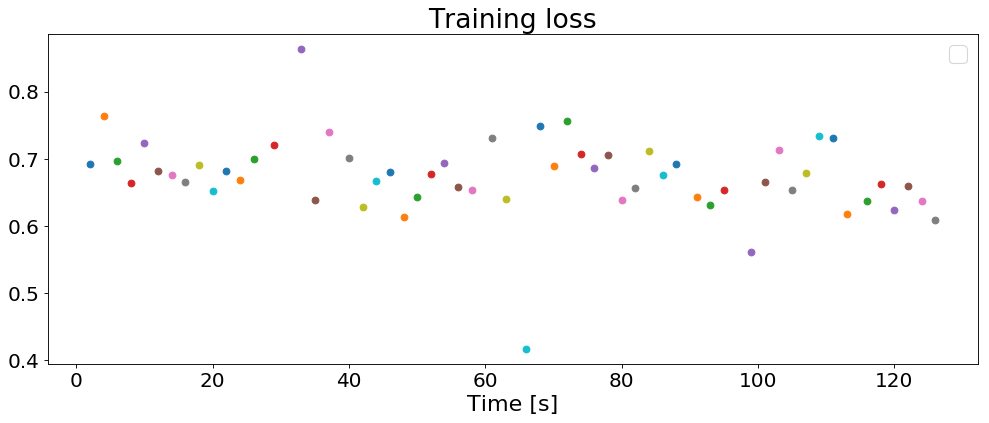

In [11]:
# Plot loss

fig_trloss=plt.figure(dpi= 80, facecolor='w', edgecolor='k')

plot = plt.subplot(2, 1, 1)
plt.title('Training loss',fontsize= fs_title)

for i in range(1,len(log_dict)):
    time = log_dict[i]['time']
    loss = log_dict[i]['loss']
    plt.plot(time, loss, marker = 'o')
plt.xlabel('Time [s]', fontsize= fs_ax_labels)

plt.legend(loc='best', fontsize = fs_legend)
plt.gcf().set_size_inches(15, 12)
plot.tick_params(axis='both', which='major', labelsize=fs_tick_labels)
plt.show()

No handles with labels found to put in legend.


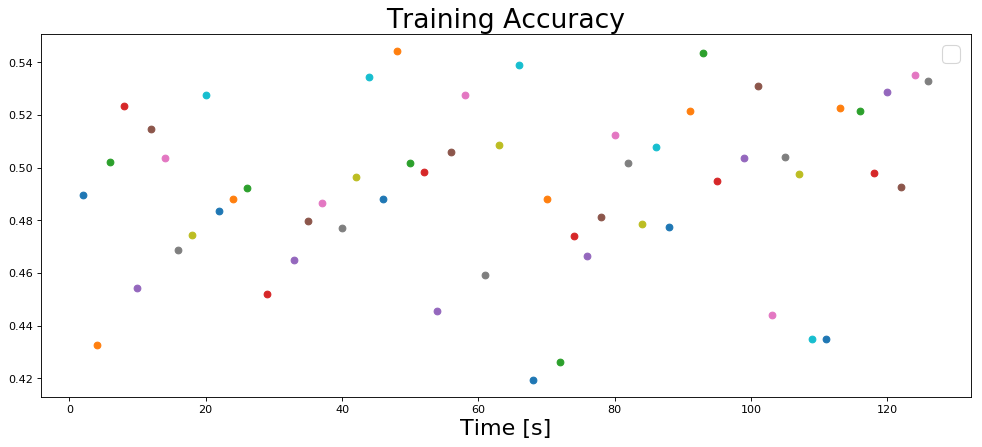

In [12]:
# Plot training accuracy

fig_trloss=plt.figure(dpi= 80, facecolor='w', edgecolor='k')
#plot = fig_tr_acc.add_subplot(111)

#plot = plt.subplot(2, 1, 1)
plt.title('Training Accuracy', fontsize=fs_title)


for i in range(1,len(log_dict)):
    time = log_dict[i]['time']
    acc = log_dict[i]['train_accuracy']
    plt.plot(time, acc, marker = 'o')
plt.xlabel('Time [s]', fontsize= fs_ax_labels)

plt.xlabel('Time [s]', fontsize = fs_ax_labels)
plt.legend(loc='best', fontsize= fs_legend)
plt.gcf().set_size_inches(15, 6)
plot.tick_params(axis='both', which='major', labelsize=fs_tick_labels)
plt.show()

KeyError: 'val_accuracy'

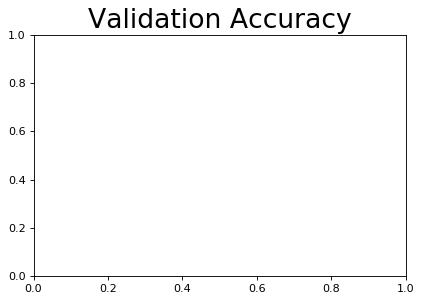

In [13]:
# Plot valdiation accuracy

fig_val_acc=plt.figure(dpi= 80, facecolor='w', edgecolor='k')
plot = fig_val_acc.add_subplot(111)

plt.title('Validation Accuracy', fontsize=fs_title)

for i in range(1,len(log_dict)):
    time = log_dict[i]['time']
    acc = log_dict[i]['val_accuracy']
    plt.plot(time, acc, marker = 'o')


plt.xlabel('Epoch', fontsize = fs_ax_labels)
plt.legend(loc='best', fontsize= fs_legend)
plt.gcf().set_size_inches(15, 6)
plot.tick_params(axis='both', which='major', labelsize=fs_tick_labels)
plt.show()

In [ ]:
### Plot overfitting curves (difference between train_acc and small_val_acc)

fig_overfitting=plt.figure(dpi= 80, facecolor='w', edgecolor='k')
plot = fig_overfitting.add_subplot(111)

plt.title('Overfitting', fontsize=fs_title)

for i in range(1,len(log_dict)):
    time = log_dict[i]['time']
    overfit = abs(log_dict[i]['val_accuracy']-log_dict[i]['train_accuracy'])
    
    at_end = overfitting[-1]
    print("\tAverage:%.3f\tOverfitting at end:%.3f" % (average, at_end))
    plt.plot(time, acc, marker = 'o')

    
plt.xlabel('Time', fontsize=fs_ax_labels)
plt.ylabel('acc (train) - acc (val)', fontsize=fs_ax_labels)
plt.legend(loc='best', fontsize=fs_legend)
plt.gcf().set_size_inches(15, 6)
plot.tick_params(axis='both', which='major', labelsize=fs_tick_labels)

plt.show()

In [ ]:
### Save graphics
path = '../Poster/GraphicsClipboard/'
#fig_trloss.savefig(path+'tr_loss.pdf',bbox_inches='tight', format='pdf')
# fig_val_acc.savefig(path+'val_acc.pdf',bbox_inches='tight', format='pdf')
# fig_tr_acc.savefig(path+'tr_acc.pdf',bbox_inches='tight', format='pdf')

fig_asl_model.savefig(path+'acc_asl.pdf',bbox_inches='tight', format='pdf')
#fig_combi_model.savefig(path+'acc_combi.pdf',bbox_inches='tight', format='pdf')

#fig_overfitting.savefig(path+'overfitting.pdf',bbox_inches='tight', format='pdf')
#fig_3acc.savefig(path+'3_accuracies.pdf',bbox_inches='tight', format='pdf')
#fig_val_matrix.savefig(path+'val_conf_matrix.pdf',bbox_inches='tight', format='pdf')
#fig_test_matrix.savefig(path+'test_conf_matrix.pdf',bbox_inches='tight', format='pdf')



In [ ]:
# extract from certain line
print(a[182])
teststring = a[182]
#time = 
def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

def find_between_r( s, first, last ):
    try:
        start = s.rindex( first ) + len( first )
        end = s.rindex( last, start )
        return s[start:end]
    except ValueError:
        return ""
    
time = find_between( teststring, "time:", "s parleys:" )
parleys = find_between( teststring, "parleys:", " ] {" )
total = find_between( teststring, "'total': ", ", 'accuracy':" )
accuracy = find_between( teststring, "'accuracy': ", ", 'f1':" )
f1 = find_between( teststring, "'f1': ", ", 'loss'" )
loss = find_between( teststring, "'loss': ", ", 'ppl'" )
ppl = find_between( teststring, "'ppl': ", "}" )





print(time)
print(parleys)
print(total)
print(accuracy)
print(f1)
print(loss)
print(ppl)

#print(find_between( s, "time:", "s" ))
#print(find_between_r( s, "time:", "s" ))